# DODAJ NASLOV

<br>

**Sadržaj:**
* 1.[Općenito o grafovima](#uvod)
* 2.[Pretraživanje prostora stanja](#pps)
    * 2.1 [BFS](#bfs)
    * 2.2 [DFS](#dfs)
* 3.[Primjena BFS i DFS](#labirint)
* 4.[Zaključak](#kraj)
* 5.[Literatura](#lit)

## Općenito o grafovima <a name="uvod"></a>


**Def:** <i>**Jednostavan graf G** sastoji se od nepraznog konačnog skupa skupa V čije
elemente zovemo **vrhovi** i konačnog skupa E različitih parova elemenata V koje
zovemo **bridovi**.</i>

Smatramo da je graf zadan ako su zadani njegovi skupovi vrhova i bridova. Označavamo ga s **G(V,E)**.

**Oznake:**
* U teoremima i definicijama vrhove obično označavamo malim slovima  *u,v*, a bridove slovima *e,f*. 
* Brid između vrhova *u* i *v* označavamo sa *e={u,v}* ili *e=uv*. 
* U grafovima vrhove označavamo velikim tiskanim slovima A,B,C, ...
<br><br>

**Def:** <i>Za vrhove u i v kažemo da su ***susjedni*** ako postoji brid *e=uv* u tom grafu koji
ih spaja. Za bridove e i f kažemo da su susjedni ako postoji vrh u u tom grafu koji je njima
zajednički.</i> 
<br><br>


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

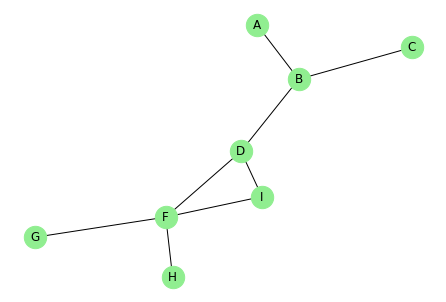

In [8]:
df = pd.DataFrame({'source': ['A', 'B','B','D','F','F','D','I'],
                   'target': ['B','C','D','F','G','H','I','F']})
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(df)
nx.draw(g1, with_labels=True, node_color="lightgreen", node_shape='o', node_size=500)
plt.draw()

    Slika 1. Primjer grafa

**Def:** <i>**Put u grafu G** je konačan slijed bridova v1v2,v2v3,…,vn-1vn u kojem su svaka
dva brida susjedna i svi su vrhovi različiti, osim eventualno početni i krajnji. Put možemo
označavati i kao v1 → v2 → v3 → ... → vn.</i>

**Def:** <i>Za graf G kažemo da je **povezan** onda i samo onda ako postoji put između
svaka dva vrha.</i>
<br><br>

Na slici 1. vidimo primjer povezanog grafa, a u donjem primjeru ćemo vidjeti primjer nepovezanog.

In [9]:
g1.remove_node('D')

g1.nodes() #ispisuje nam sve vrhove u grafu 

NodeView(('A', 'B', 'C', 'F', 'G', 'H', 'I'))

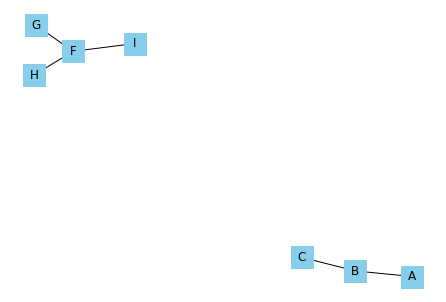

In [10]:
nx.draw(g1, with_labels=True, node_color="skyblue", node_shape='s', node_size=500)
plt.show()

    Slika 2. Primjer nepovezanog grafa

**Def:** *Kažemo da je graf **potpuno povezan** ako su svaka dva vrha u grafu povezana točno jednim bridom.*

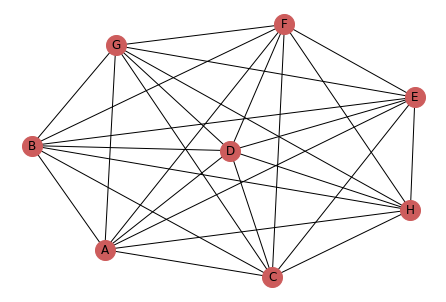

In [11]:
g2=nx.Graph()
nodes2=np.array(['A','B','C','D','E','F','G','H'])
n=nodes2.size
for i in range(0,n,1):
    g2.add_node(nodes2[i])
    
g2=nx.complete_graph(g2.nodes())

nx.draw(g2, with_labels=True, node_size=400, node_shape='o', node_color="indianred")

    Slika 3. Primjer potpuno povezanog grafa

* 1.TU TREBA SMISLITI NEKI PRIJELAZ
* 2.POGLEDATI MOZE LI SE MIJENJATI FONT

g2.size() #[n for n in g2.edges]
a=np.array(g2.edges)
s=a.shape[0]
for n in g2:
    print(n, ' : ')
    for i in range (0,s,1):
        if(n == a[i][0]):
            print (a[i][1])
        elif (n == a[i][1]):
            print (a[i][0])

a=np.array(g2.edges)
a

a[0,0], a[0][1], a[1,0], a[1,1]

## Pretraživanje prostora stanja <a name="pps"></a>

### BFS <a name="bfs"></a>

In [314]:
br_bfs = 0;
lista=[]
from collections import deque

In [350]:
graph = {'A': ['B', 'C','E'],
         'B': ['A', 'C'],
         'C': ['B','D'],
         'D': ['C', 'E'],
         'E': ['F','D'],
         'F': ['C']}

In [377]:
def isDefined(Dict, Key):
    for k in Dict:
        if k==Key:
            return True
    return False

In [393]:
def find_path_bfs(Dict, last):
    
    prev = Dict[last]
    path=deque()
    path.append(last)
    
    while(prev!=0):
        path.append(prev)
        prev=Dict[prev]
                
    path.reverse()
    return path

In [394]:
def BFS(graph,first,last):
    
    global br_bfs
    br_bfs = 0
    q=deque()
    posjeceni = list()
    prethodni = dict()
    q.append(first)
    prethodni[first]=0

    while q:
        
        node = q.popleft()
        
        if not(node in posjeceni):
            br_bfs+=1
            posjeceni.append(node)
            if(node==last):
                break
            
            for neighbor in graph[node]:
                q.append(neighbor)
                if not isDefined(prethodni, neighbor):
                    prethodni[neighbor] = node
                
            
    path=find_path_bfs(prethodni, last)
    print (prethodni)
    print (posjeceni)
    print (path)
    

In [395]:
BFS(graph, 'A','D')

{'A': 0, 'B': 'A', 'C': 'A', 'E': 'A', 'D': 'C', 'F': 'E'}
['A', 'B', 'C', 'E', 'D']
deque(['A', 'C', 'D'])


In [387]:
br_bfs

5

### DFS <a name="dfs"></a>

## Primjena BFS i DFS <a name="labirint"></a>

In [ ]:
def maze():
    maze=[]
    maze.append(['#',' ',' '])
    maze.append(['#',' ','#'])
    maze.append([' ',' ','#'])
    
    return maze

In [ ]:
a=maze()
for i in range (0,len(a),1):
    print (a[i])


In [249]:
def maze_to_graph(maze):
    
    graph = dict()
    neighbor=[] #lista susjeda
    n=len(maze)
    pos=-1 
    
    for i in range (0,n,1):
        for j in range(0,n,1):
            neighbor=[]
            pos+=1
            if(maze[i][j]!='#'):
                if(i+1<n and maze[i+1][j]!='#'):
                    down = pos+n
                    neighbor.append(down) #dozvoljen je pomak desno
                if(i-1>=0 and maze[i-1][j]!='#'):
                    up = pos-n
                    neighbor.append(up)
                if(j+1<n and maze[i][j+1]!='#'):
                    right = pos+1
                    neighbor.append(right)
                if(j-1>=0 and maze[i][j-1]!='#'):
                    left = pos-1
                    neighbor.append(left)
                graph[pos]=neighbor
    
    print (graph)
    
## MOZDA BI TREBALO SORTIRATI ? ? 

<font color=green>**Objašnjenje fje maze_to_graph:**</font> <br>
Želimo zadani labirint pretvoriti u graf. <br>Prazna polja u labirintu smatrat ćemo vrhovima grafa kojeg stvaramo. Polja koja su zauzeta (prepreke) ne ubacujemo u graf. <br>
Broj čvora smo odredili pomoću varijable pos koju povećavamo u svakom koraku kad se pomaknemo za jedno polje dalje u listi.
<br>`pozicija (i , j) = ( pos%n, floor(pos/n))`
<table>
    <tr><td>0</td><td>1</td><td>2</td></tr>
    <tr><td>3</td><td>4</td><td>5</td></tr>
    <tr><td>6</td><td>7</td><td>8</td></tr>
</table>
<br>
Graf spremamo u dictionary oblika cvor: [susjedi] <br>
pr. 1: [4,2]  znači da su susjedi od čvora 1, čvorovi 4 i 2.

In [247]:
maze_to_graph(a)

{1: [4, 2], 2: [1], 4: [7, 1], 6: [7], 7: [4, 6]}


## Zaključak <a name="kraj"></a>

## Literatura: <a name="lit"></a>
* http://degiorgi.math.hr/~singer/ui/ui_1415/UI-2-PretrazivanjeProstoraStanja.pdf 
* https://docs.python.org/3/library/collections.html#collections.deque
* https://networkx.github.io/documentation/networkx-2.4/reference/index.html
* https://web.math.pmf.unizg.hr/nastava/komb/predavanja/predavanja.pdf
* http://www.zemris.fer.hr/predmeti/mr/arhiva/2002-2003/seminari/finished/pdf/grafovi.pdf 
